# First PyTorch Model

### Steps to make a model
![alt text](ss3.png)

In [1]:
from multiprocessing.spawn import import_main_path
import pandas as pd
# from sklearn.model_selection import train_test_split
import torch
from torch import nn
from matplotlib import pyplot as plt
import numpy as np

In [2]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step =0.02
X = torch.arange(start ,end , step).unsqueeze(dim =1)
y = weight *X +bias


X[:10],y [:10] # just to check the first 10 value of X and y
len(X)
len(y)
print(len(X))
print(X.shape)


50
torch.Size([50, 1])


In [3]:

train_split = int (0.8 *len(X))
X_train , y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split : ],y[train_split : ]

len(X_train),len(y_train),len(X_test),len(y_test),

(40, 40, 10, 10)

In [4]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

In [5]:
class LinearReg (nn.Module):
    def __init__ (self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float
                                                
                                                
                                                
                                                ))
        self.bias = nn.Parameter(torch.randn(1,  
                                             requires_grad=True,
                                             dtype=torch.float))
        
        #forward method to define the computation in the model
    def forward(self , x : torch.Tensor)-> torch.Tensor : #x is the input data #the x here is just a variable which will hold the input values
        
        return self.weights * x +self.bias #this is lineaar regression formula
    #any subclass of nn.module requires a forward method to overide forward()
    #this defines the 
    
    

# starts with random weights and bias and try to adjusst it to the ideal weight and bias using gradient descent 
#

![s1](s1.png) 

## how does NN adjust weight and bias 
using two main algo
1. gradient descent
2. back propogation

![s2](s2.png)


In [ ]:
#
torch.manual_seed (42) # this just randomise the data
# create an instance of model 
model_0 = LinearReg()
print(list(model_0.parameters()))
print(model_0.state_dict())

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


#### my basic task is to make these random values as close as to og values of weights and bias 
which are 0.7 and 0.3 

In [7]:
#making prediction using torch.inference_model()
with torch.inference_mode():
    y_preds = model_0(X_test)

print(y_preds)

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


In [8]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

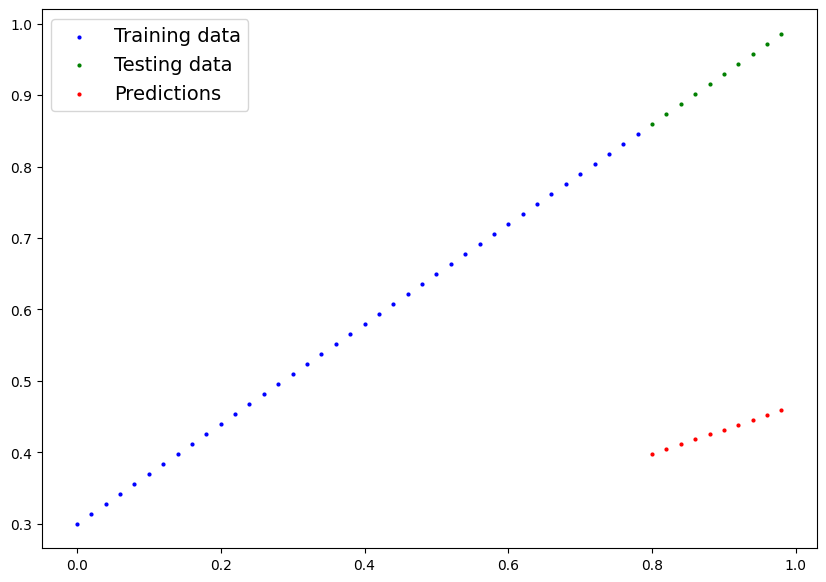

In [9]:
plot_predictions(predictions=y_preds)

#for ideal model the red dots must be overlapping the green dots

we can also do `model_0.predict(X_test)` but we used inference to turn of gradient decent and backtracking 
in `.predict` the gradient decent and back track is on so we want to avoid it

In [10]:
#loss function
from scipy import optimize

loss_fn = nn.L1Loss() # we are using MAE loss (mean absoulte error) which is distance betwwen actual vs predicted values
# we try to minimize the distance 
#optimizer 
optimizer = torch.optim.SGD(params=model_0.parameters(), #stochastic gradient descent
                             lr=0.01) # learning rate is the most important hyperparameter we can set
# optimizers change the value of parameters

# Building a train and test loop 

from streamlit import data_editor


1. loop through data_editor
2. Forward pass 
3. calculate loos 
4. optimize zero grad
5. Perform back propogation  -> Loss backwards `Back Propogation` - move backwards through the network to calculate the gradients of each param of out model with respect to the loss
6. Optimizer - use optimizers to improve loss and cost fucntion



In [11]:
# import test


epochs = 200

# empty list to track value 
train_loss_val = []
test_loss_val = []
epoch_count = []

# training

for epoch in range (epochs) : 
    model_0.train() #set model to train mode in pytorch sets 
    
    # 1. forward pass
    y_pred = model_0(X_train)
    # print(y_pred)
    
    # 2. Calculate Loss
    loss = loss_fn(y_pred,y_train) # input first target baad me

    
    # 3. optimize zero grad
    optimizer.zero_grad() 
    
    # 4. perfrom back propogation
    loss.backward()
    
    # 5. perfrom gradient descent 
    optimizer.step()
    
    # testing
    model_0.eval()  #will turn off things behind the scene that is not needed while evaluation
    with torch.inference_mode() :
        # 1. forward pass
        test_pred = model_0(X_test)
        # 2. Calcualte the loss
        test_loss = loss_fn (test_pred , y_test)
    if epoch % 10 == 0 :
        epoch_count.append(epoch)
        train_loss_val.append(loss.detach().numpy())
        test_loss_val.append(test_loss.detach().numpy())
        print(F"Epoch :{epoch} | loss : {loss} | Test Loss ; {test_loss}")

print(model_0.state_dict())
print(f"loss : {loss}")

Epoch :0 | loss : 0.31288138031959534 | Test Loss ; 0.48106518387794495
Epoch :10 | loss : 0.1976713240146637 | Test Loss ; 0.3463551998138428
Epoch :20 | loss : 0.08908725529909134 | Test Loss ; 0.21729660034179688
Epoch :30 | loss : 0.053148526698350906 | Test Loss ; 0.14464017748832703
Epoch :40 | loss : 0.04543796554207802 | Test Loss ; 0.11360953003168106
Epoch :50 | loss : 0.04167863354086876 | Test Loss ; 0.09919948130846024
Epoch :60 | loss : 0.03818932920694351 | Test Loss ; 0.08886633068323135
Epoch :70 | loss : 0.03476089984178543 | Test Loss ; 0.0805937647819519
Epoch :80 | loss : 0.03132382780313492 | Test Loss ; 0.07232122868299484
Epoch :90 | loss : 0.02788739837706089 | Test Loss ; 0.06473556160926819
Epoch :100 | loss : 0.024458957836031914 | Test Loss ; 0.05646304413676262
Epoch :110 | loss : 0.021020207554101944 | Test Loss ; 0.04819049686193466
Epoch :120 | loss : 0.01758546568453312 | Test Loss ; 0.04060482233762741
Epoch :130 | loss : 0.014155393466353416 | Test L

In [12]:
# for 1000 epoch 
# OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
# loss : 0.002432482451200485

# for 100
# OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])
# loss : 0.02479521557688713


# for 200
# OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
# loss : 0.0025885067880153656

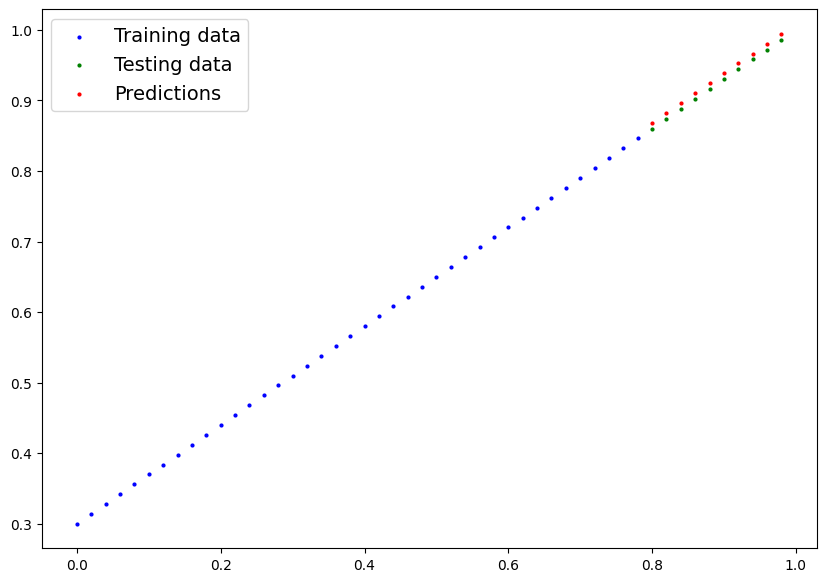

In [13]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds_new)  # this will show the trained model's predictions


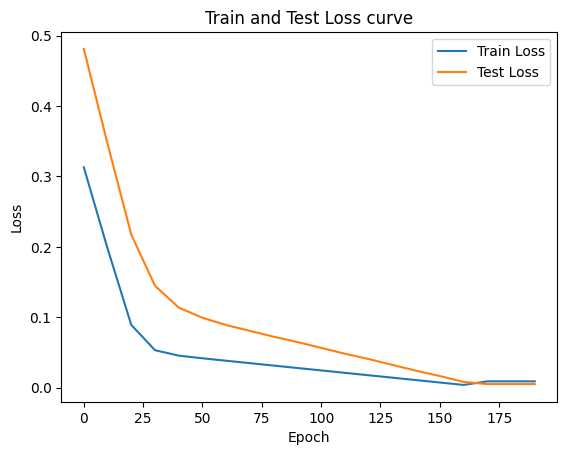

In [14]:
# plot loss curve 




plt.plot(epoch_count,train_loss_val,label = 'Train Loss')
plt.plot(epoch_count,test_loss_val,label = 'Test Loss')
plt.title("Train and Test Loss curve")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

## Saving a model in pytorch 
1. `Torch.save()` allow save a  pytorch object  in  python  pickel  format
2. `torch.load()`   allows  to load a   pytorch object
3.  `torch.nn.Module.load_state_dict()` allows to load models saved dict 